In [1]:
%matplotlib inline
import sys
BIN = '../../'
sys.path.append(BIN)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


import my_matplotlib_style as ms
import matplotlib as mpl
mpl.rc_file(BIN + 'my_matplotlib_rcparams')

In [2]:
# Load data
#train = pd.read_pickle(BIN + 'processed_data/aod/partial_train.pkl')
#test = pd.read_pickle(BIN + 'processed_data/aod/partial_test.pkl')

#train = pd.read_pickle(BIN + 'processed_data/aod/full_train.pkl')
#test = pd.read_pickle(BIN + 'processed_data/aod/full_test.pkl')

train = pd.read_pickle(BIN + 'processed_data/aod/all_jets_partial_train.pkl')
test = pd.read_pickle(BIN + 'processed_data/aod/all_jets_partial_test.pkl')

#train = pd.read_pickle(BIN + 'processed_data/aod/all_jets_full_train.pkl')
#test = pd.read_pickle(BIN + 'processed_data/aod/all_jets_full_test.pkl')

train['pt'] = train['pt'] / 1000.  # Convert to GeV
test['pt'] = test['pt'] / 1000.  # Convert to GeV
train['m'] = train['m'] / 1000.  # Convert to GeV
test['m'] = test['m'] / 1000.  # Convert to GeV

train['LeadingClusterPt'] = train['LeadingClusterPt'] / 1000.  # Convert to GeV
test['LeadingClusterPt'] = test['LeadingClusterPt'] / 1000.  # Convert to GeV

train['LeadingClusterSecondR'] = train['LeadingClusterSecondR'] / 1000.  # Convert to GeV
test['LeadingClusterSecondR'] = test['LeadingClusterSecondR'] / 1000.  # Convert to GeV

train['LeadingClusterSecondLambda'] = train['LeadingClusterSecondLambda'] / 1000.  # Convert to GeV
test['LeadingClusterSecondLambda'] = test['LeadingClusterSecondLambda'] / 1000.  # Convert to GeV

train.pop('JetGhostArea')
test.pop('JetGhostArea')
train.pop('BchCorrCell')
test.pop('BchCorrCell')

# Remove all jets with EMFrac outside (-2, 2)
train = train[(train['EMFrac'] < 2) & (train['EMFrac'] > -2)]
test = test[(test['EMFrac'] < 2) & (test['EMFrac'] > -2)]

In [3]:
for key in test.keys():
    print(key)

pt
eta
phi
m
ActiveArea
ActiveArea4vec_eta
ActiveArea4vec_m
ActiveArea4vec_phi
ActiveArea4vec_pt
AverageLArQF
NegativeE
HECQuality
LArQuality
Width
WidthPhi
CentroidR
DetectorEta
LeadingClusterCenterLambda
LeadingClusterPt
LeadingClusterSecondLambda
LeadingClusterSecondR
N90Constituents
EMFrac
HECFrac
Timing
OotFracClusters10
OotFracClusters5


In [4]:
len(train.keys())

27

In [5]:
train.head()

,pt,eta,phi,m,ActiveArea,ActiveArea4vec_eta,ActiveArea4vec_m,ActiveArea4vec_phi,ActiveArea4vec_pt,AverageLArQF,...,LeadingClusterCenterLambda,LeadingClusterPt,LeadingClusterSecondLambda,LeadingClusterSecondR,N90Constituents,EMFrac,HECFrac,Timing,OotFracClusters10,OotFracClusters5
10841203,76.395562,2.551444,-0.644569,8.928354,0.528585,2.589474,0.151597,-0.652557,0.517514,1038.006104,...,1195.811523,39.840117,44.922352,8.611044,4.0,0.302607,0.696391,0.244543,0.000000,0.000000
2478188,28.675375,0.900313,-1.952856,7.881052,0.508639,0.916086,0.147628,-1.951760,0.499531,122.948654,...,25.230358,7.836223,28.356055,7.591930,12.0,0.766227,0.000000,1.181435,0.065003,0.221785
3171379,167.436844,0.194945,-2.188446,13.721005,0.518612,0.209248,0.150651,-2.178825,0.508215,56.737061,...,1502.329102,64.280051,34.982254,119.096180,4.0,0.411470,0.000000,0.246874,0.015531,0.015531
10616755,34.359961,1.563726,0.265730,5.162133,0.478719,1.581886,0.134544,0.258161,0.470514,75.541565,...,1101.789062,19.374385,538.964500,33.847000,5.0,0.443485,0.276325,-2.783324,0.112619,0.112619
3493566,22.086941,1.128521,-1.433368,3.426685,0.378986,1.075723,0.102861,-1.408685,0.371212,369.198914,...,2315.847412,3.837655,59.464027,4.555738,4.0,0.543178,0.000000,-5.062422,0.315627,0.485570


In [6]:
def plot_all(data, logy=False):
    for key in data.keys():
        plt.figure()
        plt.hist(data[key], bins=80)
        plt.xlabel(str(key))
        plt.ylabel('Number of jets')
        if logy:
            plt.yscale('log')
        else:
            ms.sciy()

/Users/ericwulff/miniconda3/envs/fastairoot/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


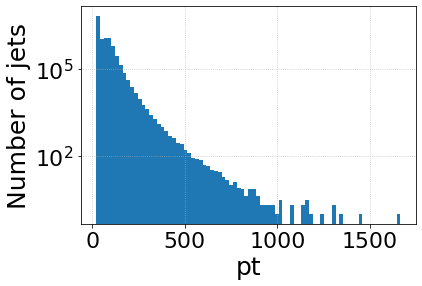

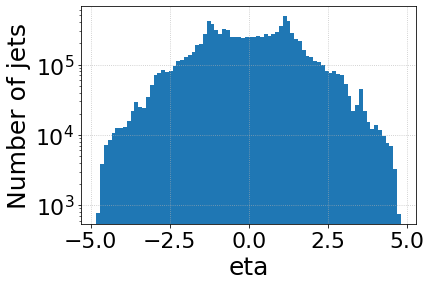

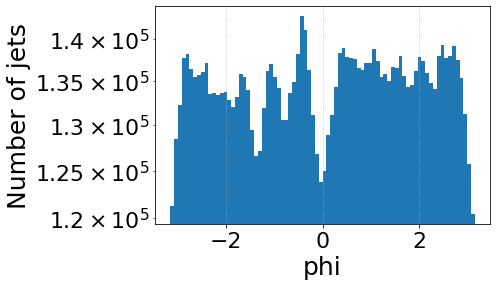

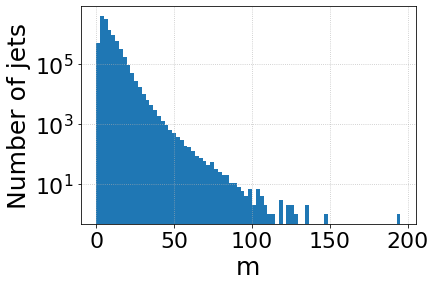

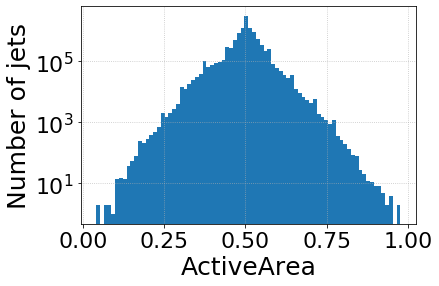

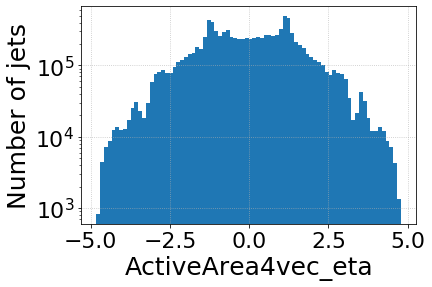

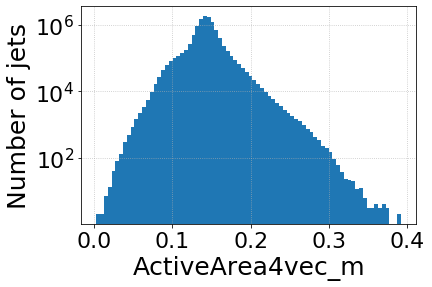

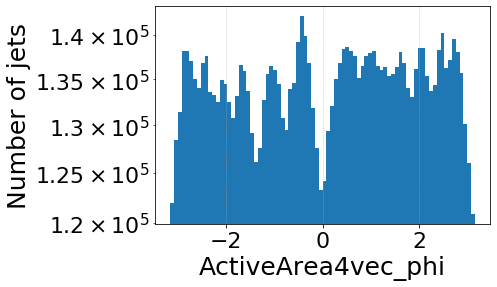

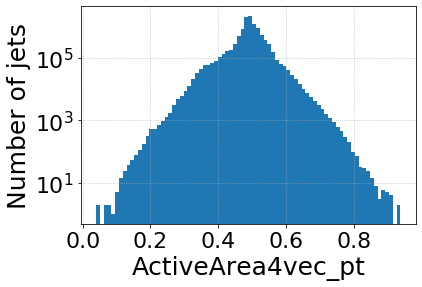

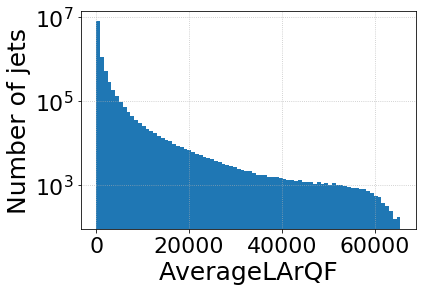

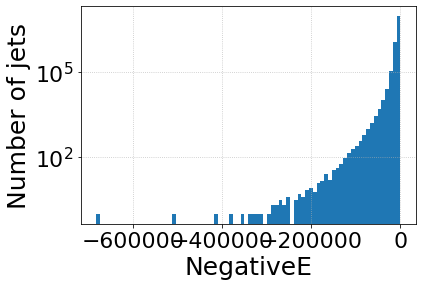

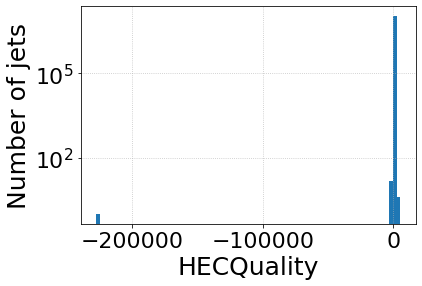

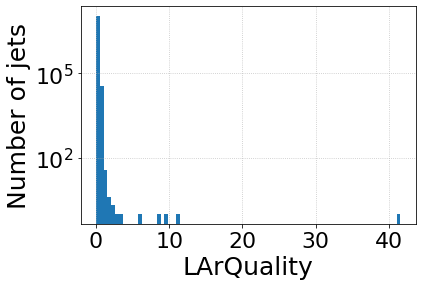

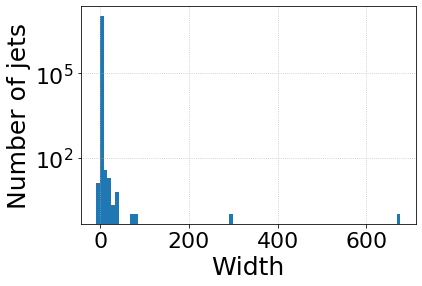

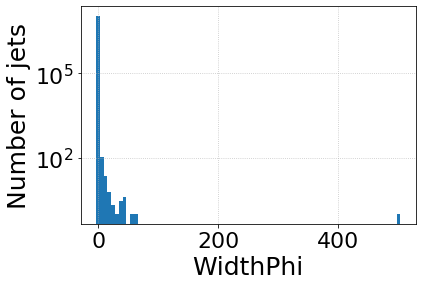

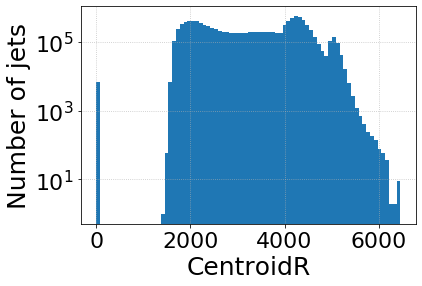

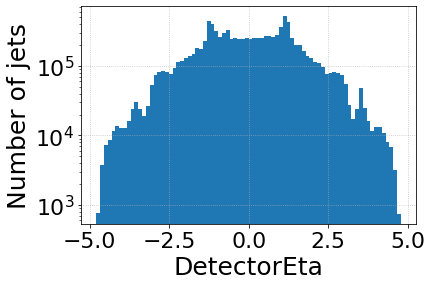

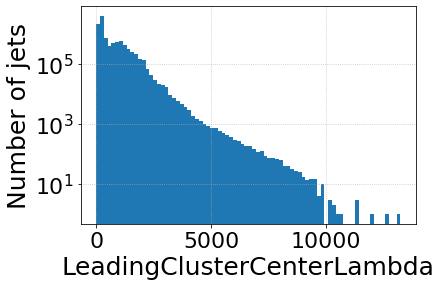

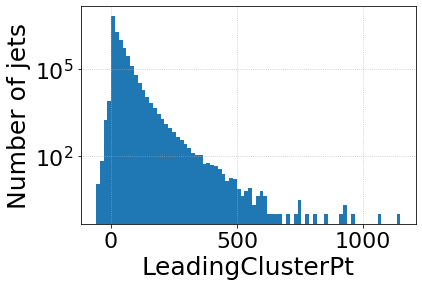

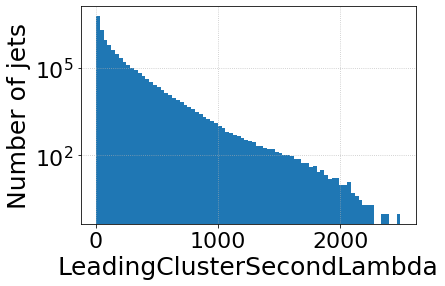

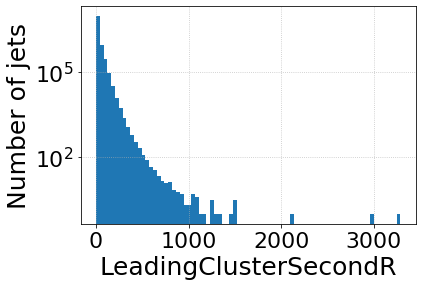

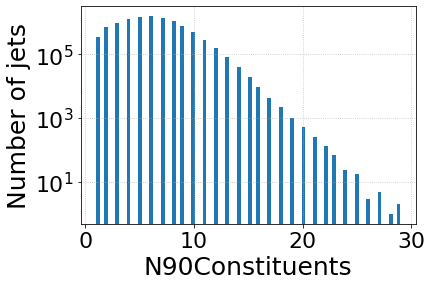

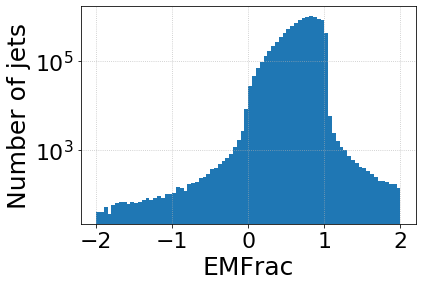

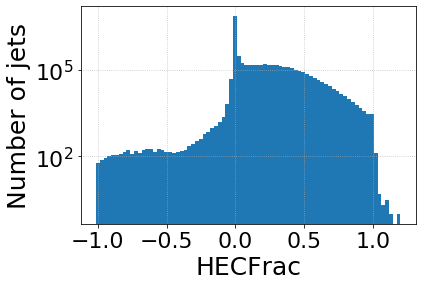

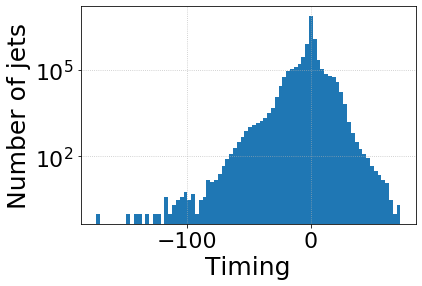

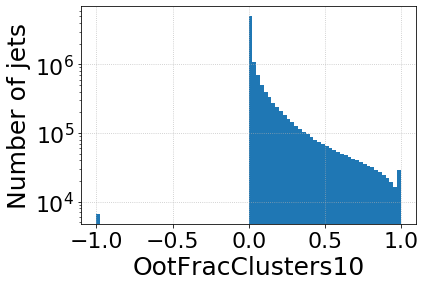

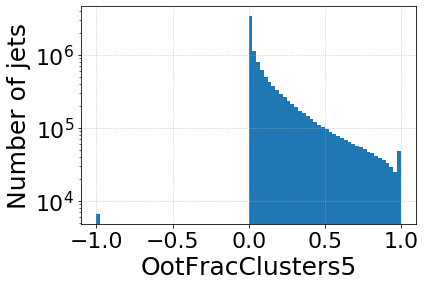

In [9]:
logy = True
plot_all(train, logy)

In [7]:
from FunctionScaler import FunctionScaler
fs = FunctionScaler.FunctionScaler(FunctionScaler.TransformedFunction_Uniform(-1,1), downplay_outofbounds_lower_n_range=None, downplay_outofbounds_upper_n_range=None, downplay_outofbounds_lower_set_point=None, downplay_outofbounds_upper_set_point= None) # calling the normal function by name
#fs = FunctionScaler.FunctionScaler("gauss-11")
#fs = FunctionScaler.FunctionScaler("gauss")

In [8]:
test_data = test.values
train_data = train.values
fs.fit(train_data[:len(train_data)//100])

In [9]:
scaled_train_data = fs.transform(train_data)
scaled_test_data = fs.transform(test_data)

In [10]:
scaled_train_df = pd.DataFrame(scaled_train_data, columns=train.columns)
scaled_test_df = pd.DataFrame(scaled_test_data, columns=test.columns)

/Users/ericwulff/miniconda3/envs/fastairoot/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


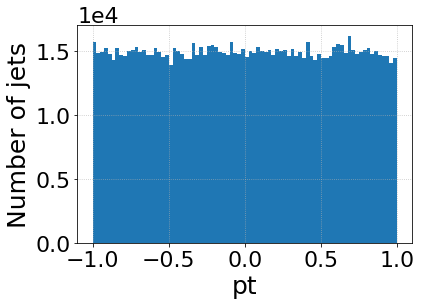

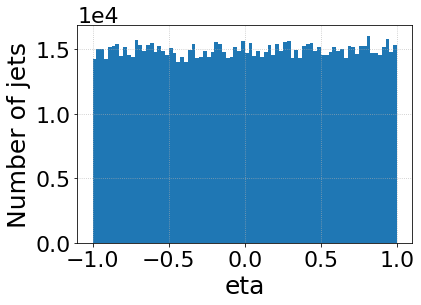

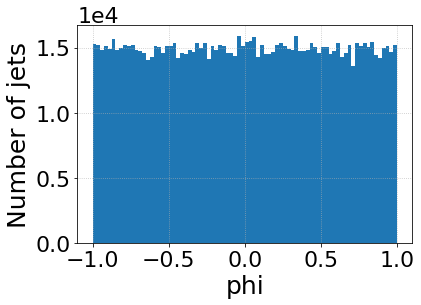

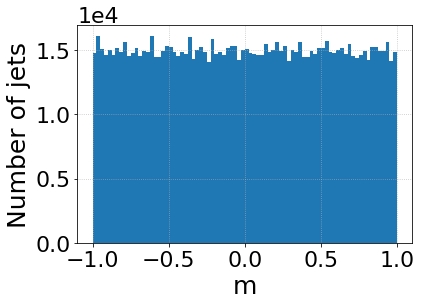

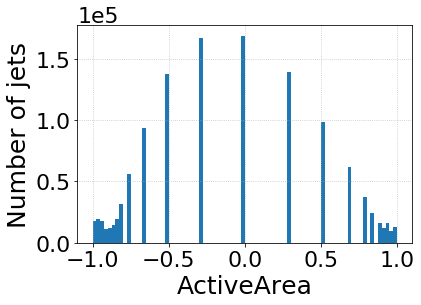

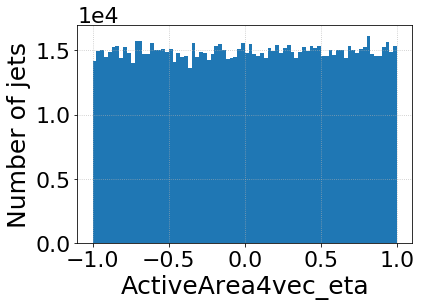

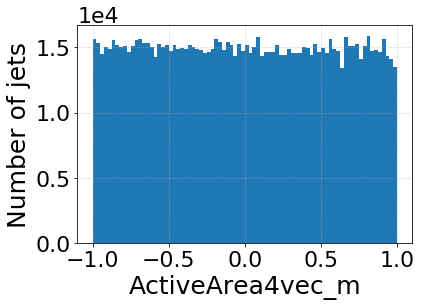

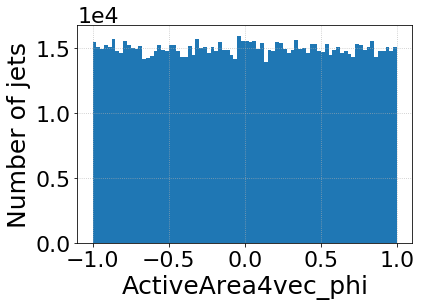

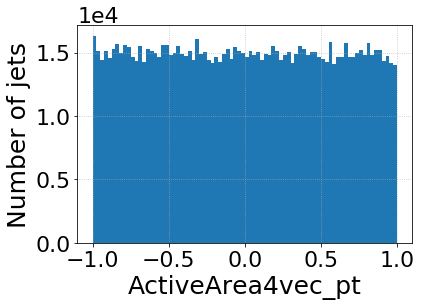

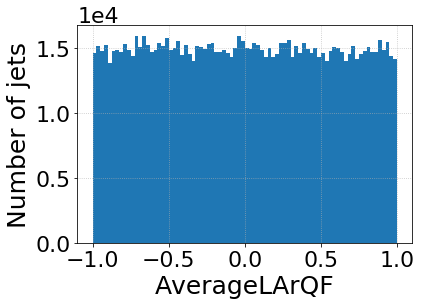

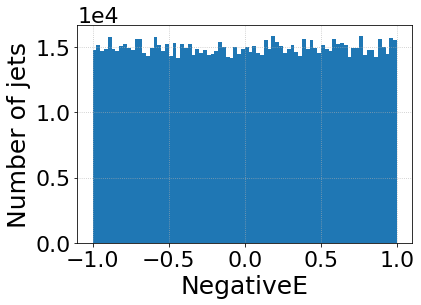

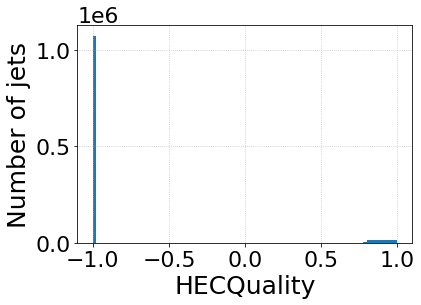

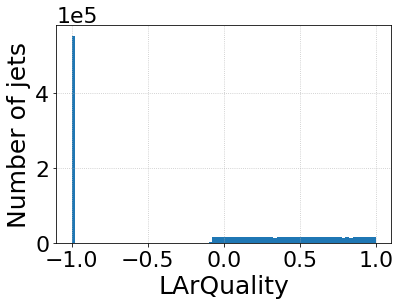

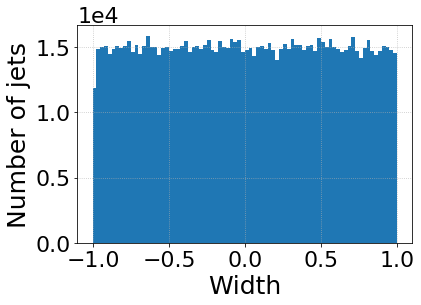

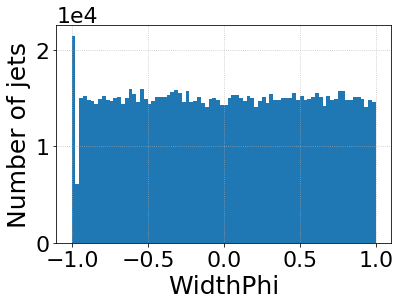

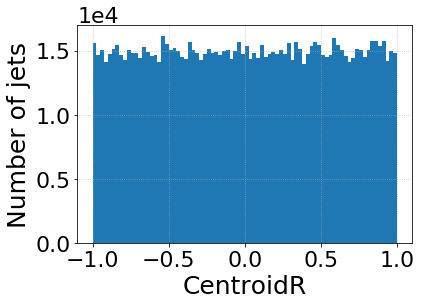

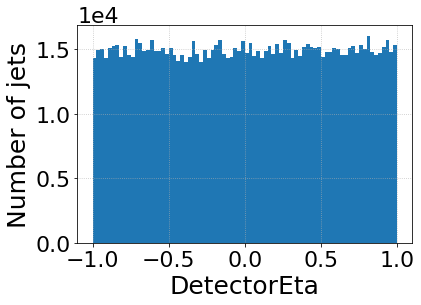

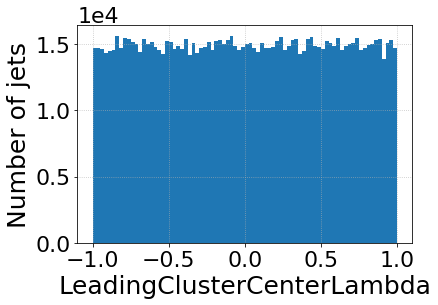

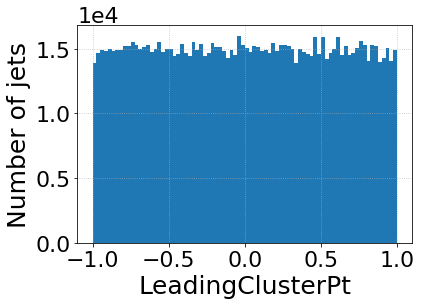

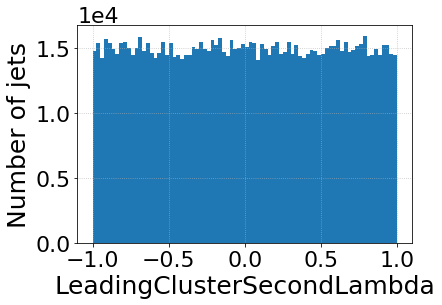

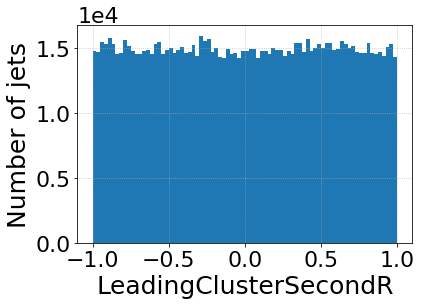

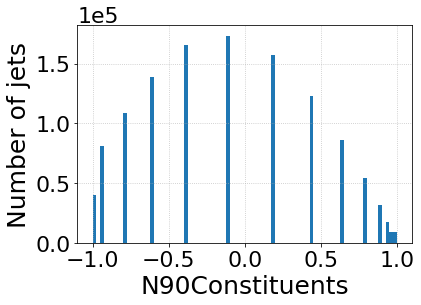

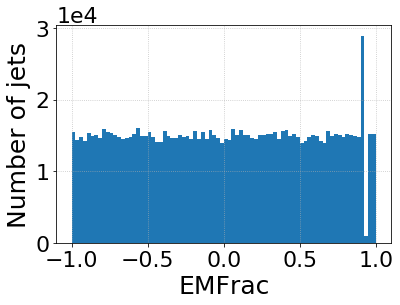

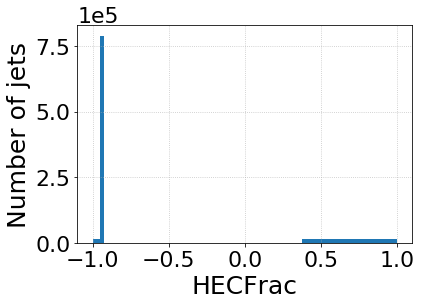

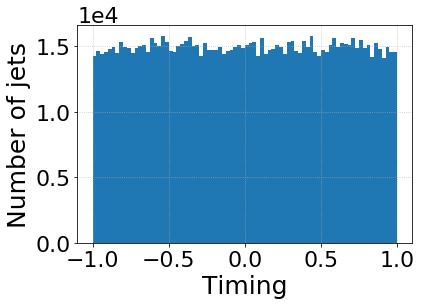

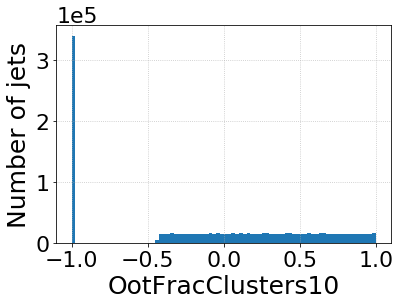

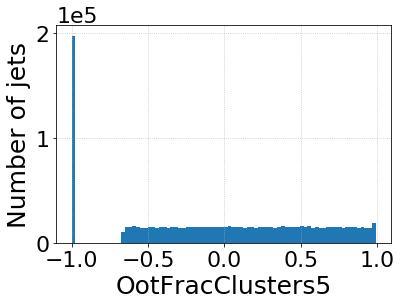

In [11]:
plot_all(scaled_test_df)

In [18]:
unscaled_data = fs.invtransform(scaled_train_data)
unscaled_df = pd.DataFrame(unscaled_data, columns=test.columns)
unscaled_df

,pt,eta,phi,m,ActiveArea,ActiveArea4vec_eta,ActiveArea4vec_m,ActiveArea4vec_phi,ActiveArea4vec_pt,AverageLArQF,...,LeadingClusterCenterLambda,LeadingClusterPt,LeadingClusterSecondLambda,LeadingClusterSecondR,N90Constituents,EMFrac,HECFrac,Timing,OotFracClusters10,OotFracClusters5
0,76.395562,2.551444,-0.644569,8.928354,0.528585,2.589474,0.151597,-0.652557,0.517514,1038.006104,...,1195.811523,39.840117,44.922352,8.611044,4.0,0.302607,0.696391,0.244543,0.000000,0.000000
1,28.675375,0.900313,-1.952856,7.881052,0.508639,0.916086,0.147628,-1.951760,0.499531,122.948654,...,25.230358,7.836223,28.356055,7.591930,12.0,0.766227,0.000000,1.181435,0.065003,0.221785
2,167.436844,0.194945,-2.188446,13.721005,0.518612,0.209248,0.150651,-2.178825,0.508215,56.737061,...,1502.329102,64.280051,34.982254,119.096180,4.0,0.411470,0.000000,0.246874,0.015531,0.015531
3,34.359961,1.563726,0.265730,5.162133,0.478719,1.581886,0.134544,0.258161,0.470514,75.541565,...,1101.789062,19.374385,538.964500,33.847000,5.0,0.443485,0.276325,-2.783324,0.112619,0.112619
4,22.086941,1.128521,-1.433368,3.426685,0.378986,1.075723,0.102861,-1.408685,0.371212,369.198914,...,2315.847412,3.837655,59.464027,4.555738,4.0,0.543178,0.000000,-5.062422,0.315627,0.485570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10751244,39.737617,-1.520191,2.796705,8.996365,0.628319,-1.596758,0.200985,2.787204,0.616554,78.187073,...,215.214447,12.830905,30.988615,4.656355,6.0,0.776672,0.071642,2.284269,0.182988,0.182988
10751245,23.296889,4.558894,0.222937,0.000016,0.498666,4.559433,0.139576,0.205219,0.488945,0.000000,...,1127.078857,-15.612791,13.018474,0.304115,1.0,0.295917,0.000000,0.000000,-1.000000,-1.000000
10751246,68.696906,-0.578934,-0.697181,8.509423,0.498666,-0.579599,0.139106,-0.688434,0.489903,84.618660,...,1114.182373,18.606762,100.932945,58.971832,8.0,0.592340,0.000000,0.104198,0.019597,0.180061
10751247,24.677043,1.134558,-3.136210,5.836042,0.528585,1.132538,0.155375,-3.097554,0.516338,342.665985,...,34.024658,5.768657,12.367843,9.751157,9.0,0.950974,0.000000,-0.078141,0.053771,0.152528


(array([5.983215e+06, 9.890310e+05, 7.144420e+05, 9.915900e+05,
        8.888170e+05, 5.173630e+05, 2.703240e+05, 1.482480e+05,
        8.833100e+04, 5.414400e+04, 3.361200e+04, 2.173600e+04,
        1.432600e+04, 9.815000e+03, 6.972000e+03, 4.777000e+03,
        3.556000e+03, 2.599000e+03, 1.819000e+03, 1.450000e+03,
        1.037000e+03, 7.790000e+02, 6.660000e+02, 4.660000e+02,
        4.070000e+02, 3.410000e+02, 2.310000e+02, 2.150000e+02,
        1.530000e+02, 1.300000e+02, 1.000000e+02, 7.300000e+01,
        7.700000e+01, 5.500000e+01, 5.000000e+01, 3.400000e+01,
        4.800000e+01, 2.800000e+01, 1.800000e+01, 2.700000e+01,
        2.200000e+01, 1.900000e+01, 1.100000e+01, 1.000000e+01,
        9.000000e+00, 1.000000e+01, 8.000000e+00, 7.000000e+00,
        4.000000e+00, 3.000000e+00, 6.000000e+00, 2.000000e+00,
        7.000000e+00, 3.000000e+00, 2.000000e+00, 1.000000e+00,
        1.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00,
        2.000000e+00, 1.000000e+00, 0.00

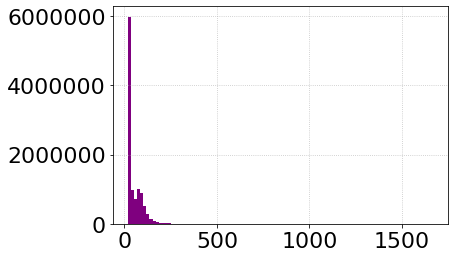

In [19]:
plt.figure()
plt.hist(unscaled_df['pt'], bins=100, color='b')
plt.hist(train['pt'], bins=100, color='r', alpha=0.5)

/Users/ericwulff/miniconda3/envs/fastairoot/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


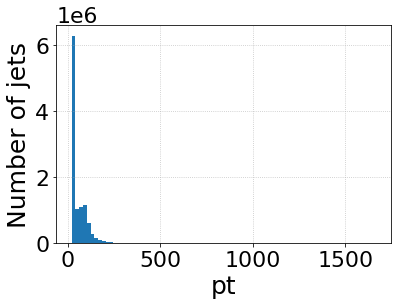

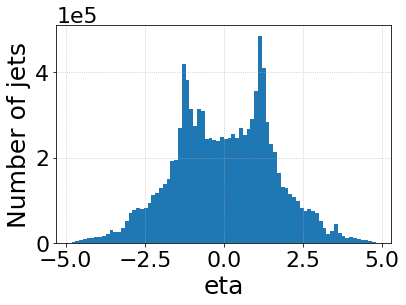

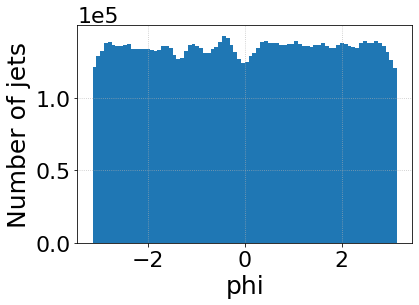

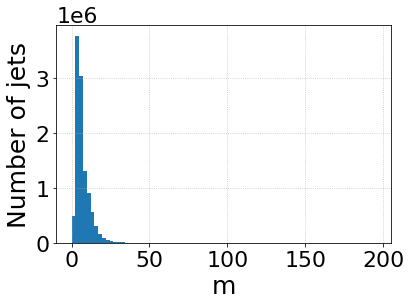

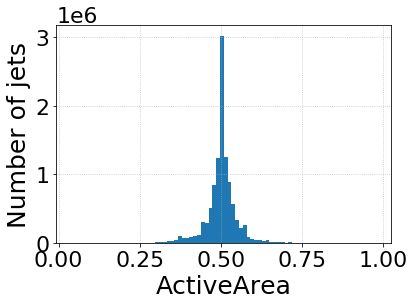

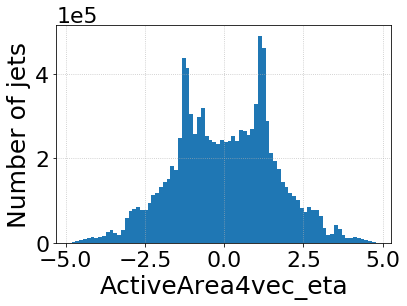

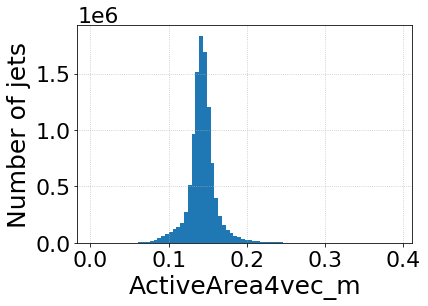

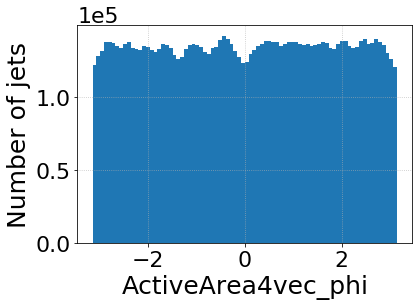

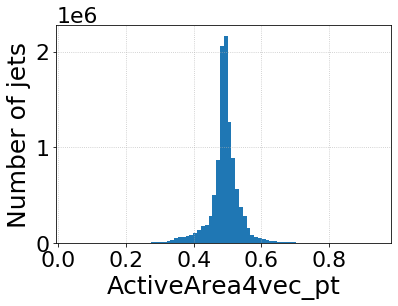

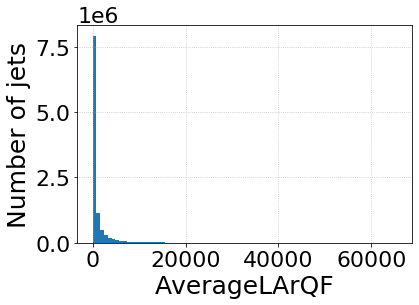

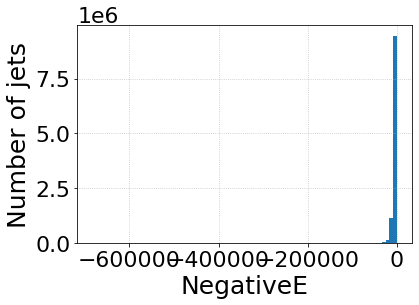

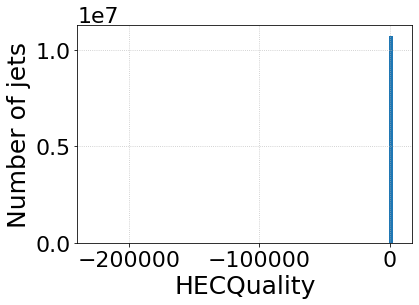

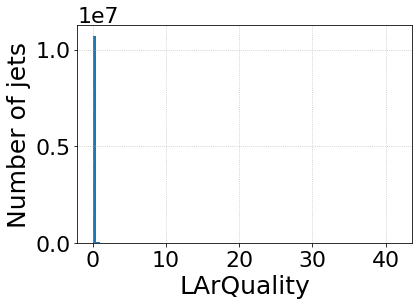

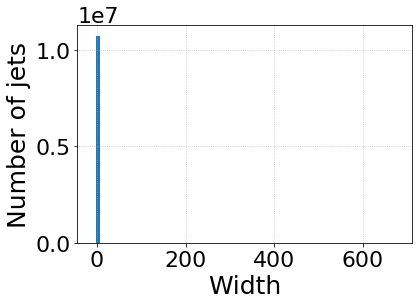

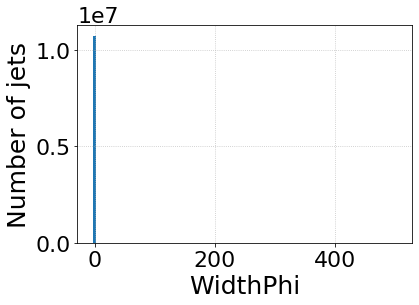

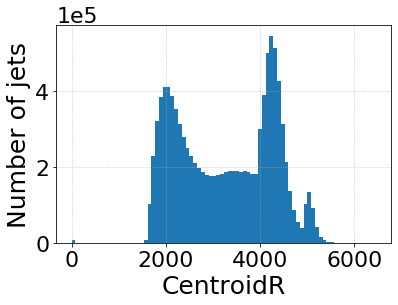

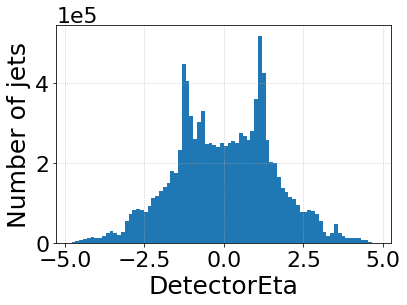

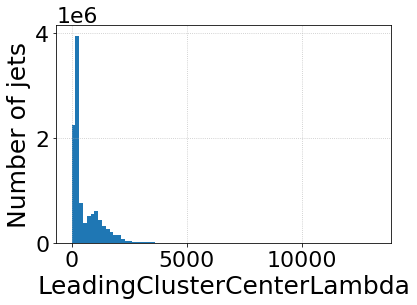

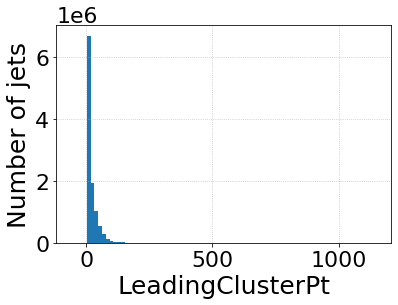

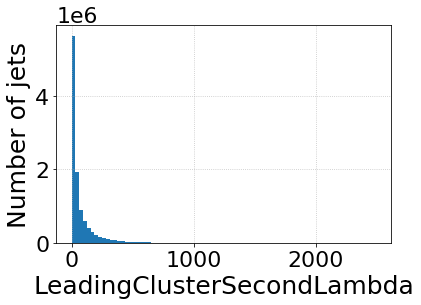

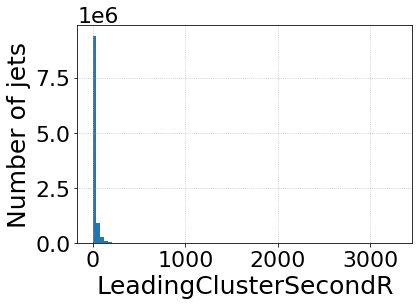

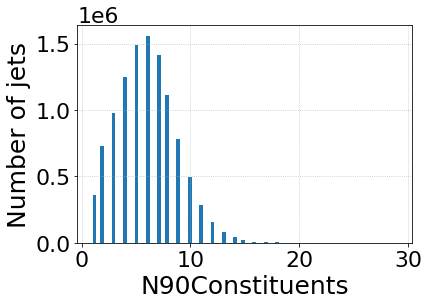

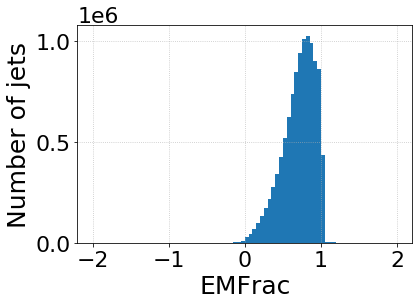

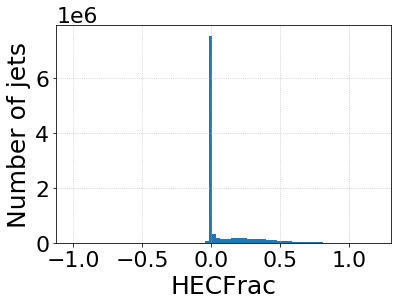

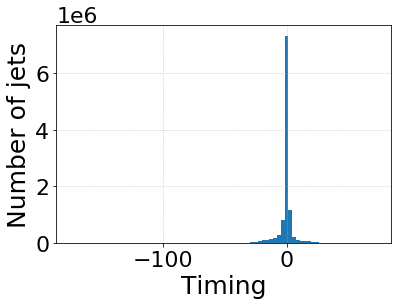

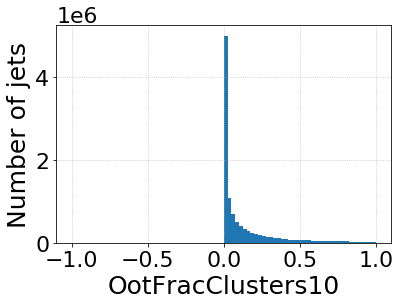

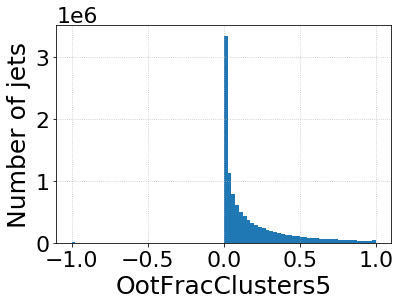

In [21]:
plot_all(unscaled_df)